<a href="https://colab.research.google.com/github/johnbensnyder/colab/blob/master/What_Neural_Networks_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO


In [0]:
image_cat_url = "https://gist.githubusercontent.com/aaronpolhamus/" \
                "964a4411c0906315deb9f4a3723aac57/raw/aa66dd9dbf6b56649fa3fab83659b2acbf3cbfd1/map_clsloc.txt"

In [0]:
cateogories = pd.read_csv(image_cat_url, sep = ' ', header = None, names = ['wnid', 'index', 'name'], index_col='index')

In [0]:
urls = BeautifulSoup(requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289").content, 'html.parser').string.split('\r\n')

In [5]:
cateogories.loc[['dog' in i for i in wnid['name']]]

NameError: ignored

In [0]:
def get_image_from_id(wnid):
  #category_id = wnid.loc[wnid['name']==category]['wnid'].values[0]
  urls = BeautifulSoup(requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid={}".format(wnid)).content, 'html.parser').string.split('\r\n')
  while True:
    try:
      an_image = Image.open(BytesIO(requests.get(np.random.choice(urls)).content))
      if np.array(an_image).mean() != 253.92395187165775:
        break
    except:
      continue
  return an_image

def get_image_from_category(category):
  category_id = cateogories.loc[cateogories['name']==category]['wnid'].values[0]
  return get_image_from_id(category_id)

def get_image_from_search(term):
  category_id = cateogories.loc[[term.lower() in i.lower() for i in cateogories['name']]].sample(1)
  return get_image_from_id(category_id['wnid'].values[0]), category_id['name'].values[0]

def get_image_random():
  category_id = cateogories.sample(1)
  return get_image_from_id(category_id['wnid'].values[0]), category_id['name'].values[0]

coral_fungus


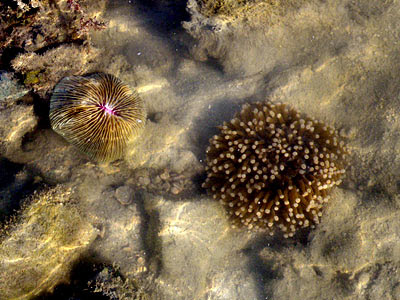

In [7]:
image, term = get_image_random()
print(term)
image

In [0]:
from keras.applications import VGG19
from keras.applications.vgg19 import decode_predictions, preprocess_input

In [9]:
vgg19 = VGG19(weights = 'imagenet')

Instructions for updating:
Colocations handled automatically by placer.
574717952/574710816 [==============================] - 6s 0us/step


In [10]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

1. file: 61.19%
2. desk: 16.22%
3. desktop_computer: 5.24%
4. radio: 2.24%
5. printer: 1.92%

True category: desk


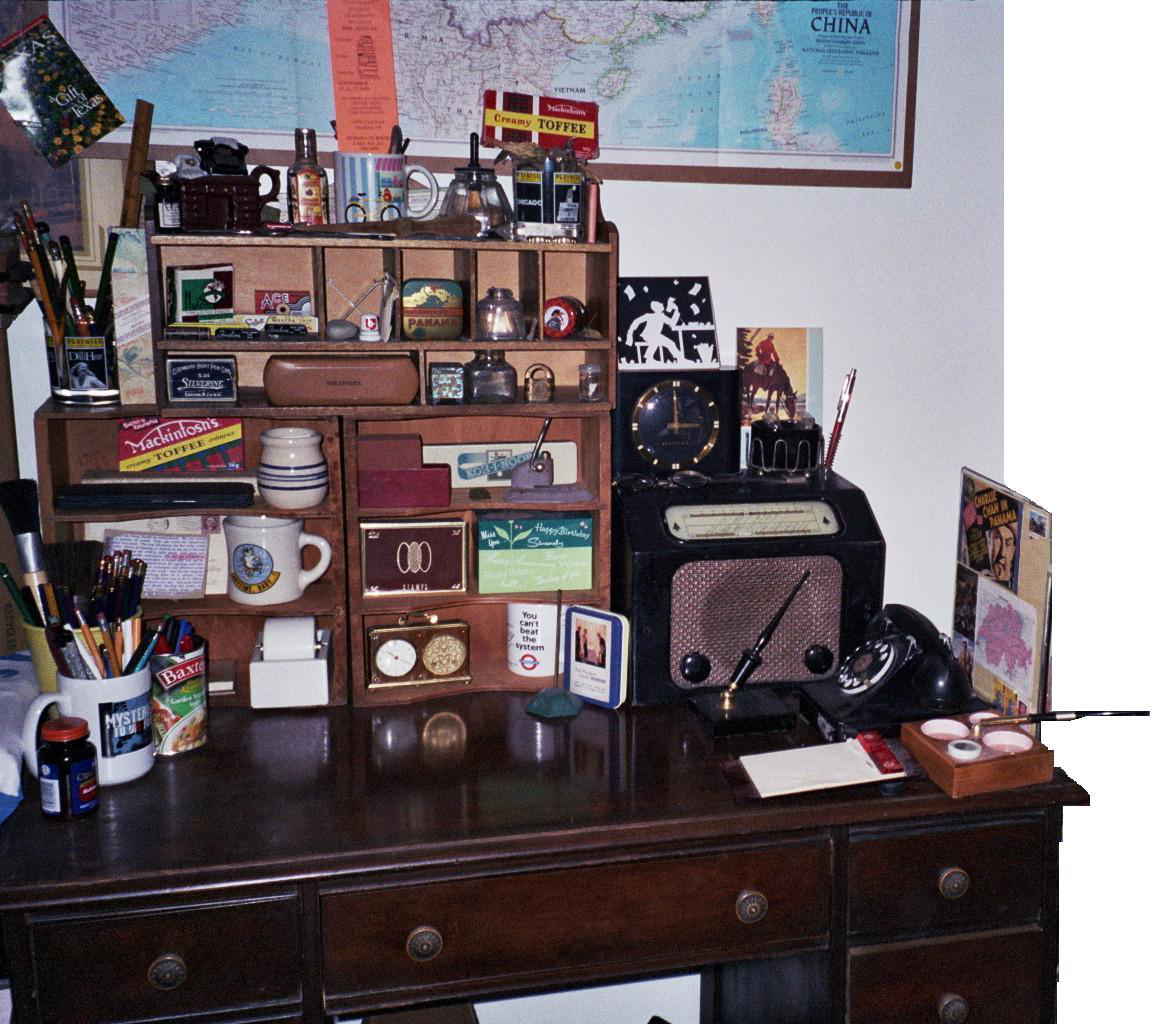

In [108]:
#image, term = get_image_random()
image, term = get_image_from_search('desk')
predictions = vgg19.predict(np.array(image.resize((224, 224))).reshape(-1, 224, 224, 3))
codes = decode_predictions(predictions, top = 5)

for i, j in enumerate(codes[0]):
  print("{}. {}: {:.2f}%".format(i+1, j[1], j[2]*100))
  
print("\nTrue category: {}".format(term))

image

1. bookcase: 68.49%
2. file: 3.14%
3. crib: 3.06%
4. refrigerator: 3.03%
5. medicine_chest: 2.85%

True category: bookcase


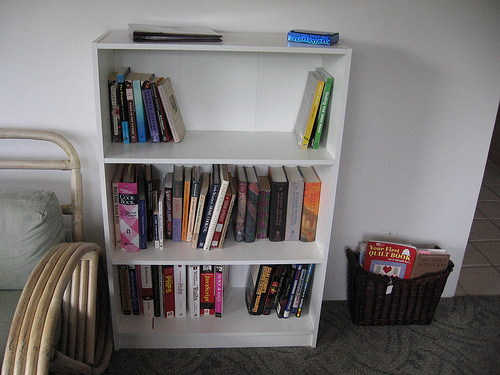

In [38]:
codes[0]

[('n01910747', 'jellyfish', 0.15286693),
 ('n07248320', 'book_jacket', 0.1477905),
 ('n01930112', 'nematode', 0.040053636),
 ('n09472597', 'volcano', 0.033131313),
 ('n02077923', 'sea_lion', 0.030263351)]